In [1]:
# yolo 추론할때
# !yolo task=detect mode=predict model=/home/addinedu/runs/detect/train31/weights/best.pt source=/home/addinedu/Desktop/yolo/qtest/* save=true save_txt=true save_crop=True

In [2]:
#학습 모델 위치 - model=/home/addinedu/runs/detect/train31/weights/best.pt 
#바운딩 박스 치고 바운딩 박스 영역만 저장 - 위치: /home/addinedu/runs/detect/predict33/crops/box
#크롭된 이미지 내에서 노란색이 차지하는 비율 구하기 
#원본 이미지 위치: /home/addinedu/runs/detect/predict33/
#크롭 이미지 위치:/home/addinedu/runs/detect/predict33/crops/box/

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib 
import glob 
import os 

# yolo predict한 이미지가 저장되어있는 경로 담는 함수 
def find_image_paths(directory):
    image_paths = glob.glob(os.path.join(directory, '*.jpg')) + glob.glob(os.path.join(directory, '*.png'))
    return image_paths

# 색상 검출 함수- 먹이 노란색으로 
def get_limits(color):
    c = np.uint8([[color]])  # BGR values
    hsvC = cv2.cvtColor(c, cv2.COLOR_BGR2HSV)

    hue = hsvC[0][0][0]  # Get the hue value

    # Handle red hue wrap-around
    if hue >= 165:  # Upper limit for divided red hue
        lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
        upperLimit = np.array([180, 255, 255], dtype=np.uint8)
    elif hue <= 15:  # Lower limit for divided red hue
        lowerLimit = np.array([0, 100, 100], dtype=np.uint8)
        upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)
    else:
        lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
        upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)

    return lowerLimit, upperLimit


def cropped_file_path(origin_image_path):
    filename, _ = os.path.splitext(os.path.basename(origin_image_path))
    cropped_image = '/home/addinedu/runs/detect/predict33/crops/box/' + filename+'.jpg'
    return cropped_image

def calculate_feed_remainder(origin_image_path):
    # 원본 이미지 읽기
    original_image = cv2.imread(origin_image_path)

    # 바운딩 박스 내 이미지 읽기
    # 바운딩 박스 내 이미지 읽기
    cropped_frame = cv2.imread(cropped_file_path(origin_image_path))

    # HSV 색상으로 변환
    hsv_image = cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2HSV)

    # 노란색의 범위 가져오기
    lower_limit = np.array([20, 100, 100])
    upper_limit = np.array([30, 255, 255])

    # 마스크 생성
    mask = cv2.inRange(hsv_image, lower_limit, upper_limit)

    # 마스크를 이미지로 변환
    masked_image = cv2.bitwise_and(cropped_frame, cropped_frame, mask=mask)

    # 각 이미지가 차지하는 픽셀 수 계산
    cropped_pixel_count = np.count_nonzero(cropped_frame)
    masked_pixel_count = np.count_nonzero(masked_image)

    # 잔여 먹이량 계산
    remained_feed = masked_pixel_count / cropped_pixel_count * 100

    return original_image, cropped_frame, masked_image, remained_feed

def show_feed_remainder(origin_image_path):
    # 잔여 먹이량 계산
    original_image, cropped_frame, masked_image, remained_feed = calculate_feed_remainder(origin_image_path)

    # 원본 이미지와 마스크된 이미지를 함께 출력
    plt.figure(figsize=(15, 5))

    # 원본 이미지 출력
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Detect')
    plt.axis('off')

    # 바운딩 박스 내 이미지 출력
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2RGB))
    plt.title('Cropped')
    plt.axis('off')

    # 잔여 먹이량 출력
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.title(f'잔여 먹이량 ({remained_feed:.2f}%)')
    plt.axis('off')

    plt.show()
    print('잔여 먹이량', f'{remained_feed:.2f}%')
    
def folder_show_feed_remainder(origin_image_path):
    origin_image_list = find_image_paths(origin_image_path)
    for origin_image_path in origin_image_list:
        show_feed_remainder(origin_image_path)
    

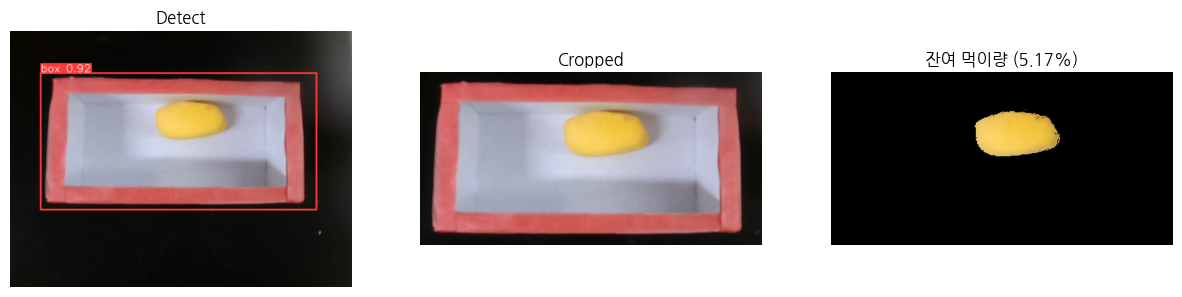

잔여 먹이량 5.17%


In [4]:
show_feed_remainder("/home/addinedu/runs/detect/predict33/captured_image_20240510164337.png") #이미지 낱장

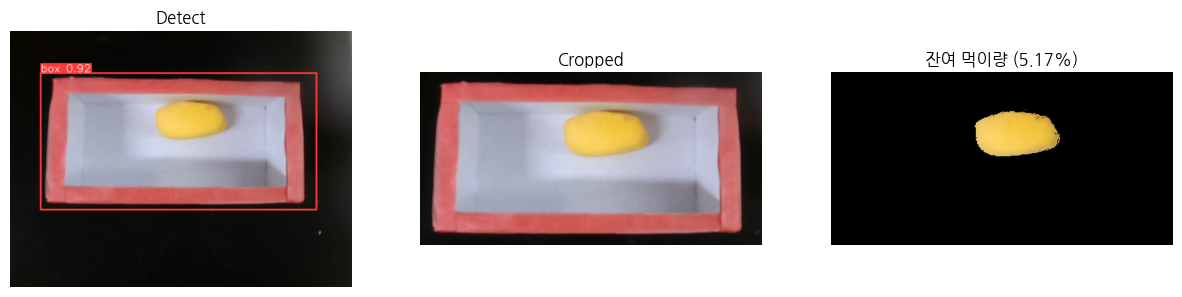

잔여 먹이량 5.17%


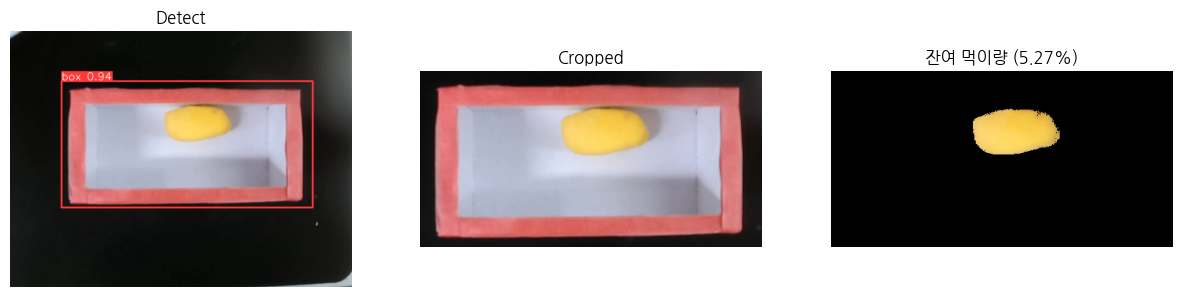

잔여 먹이량 5.27%


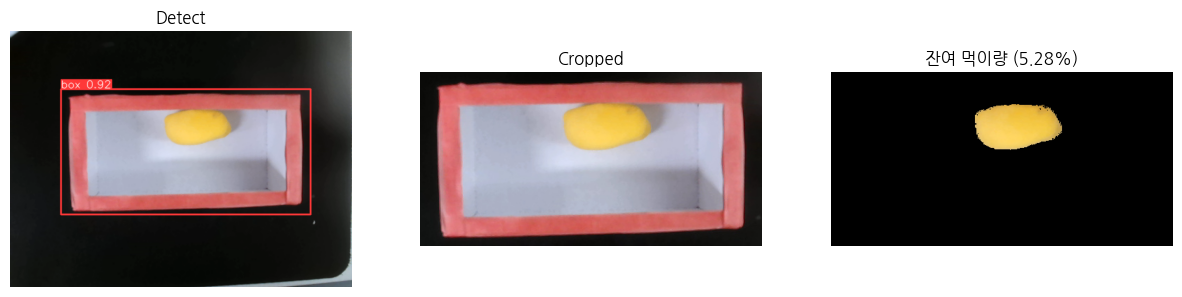

잔여 먹이량 5.28%


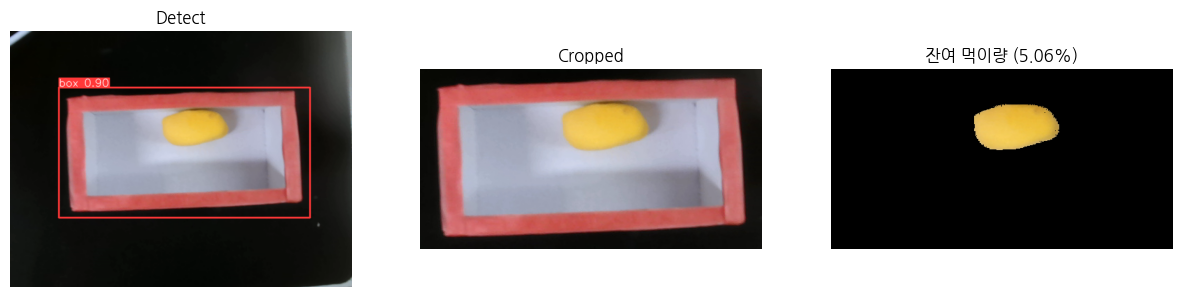

잔여 먹이량 5.06%


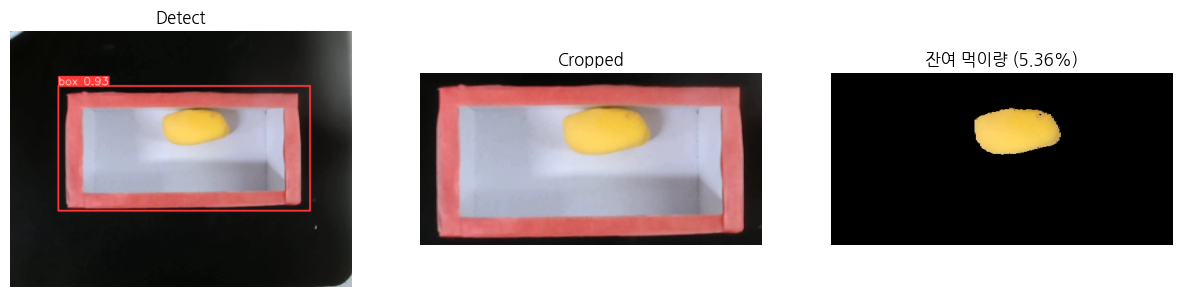

잔여 먹이량 5.36%


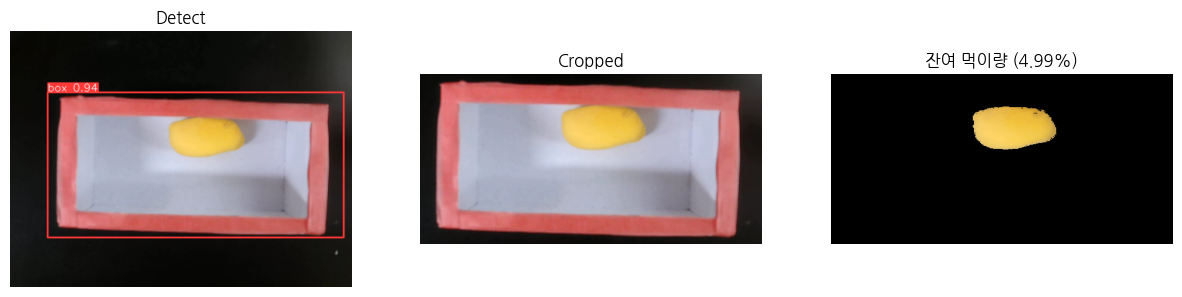

잔여 먹이량 4.99%


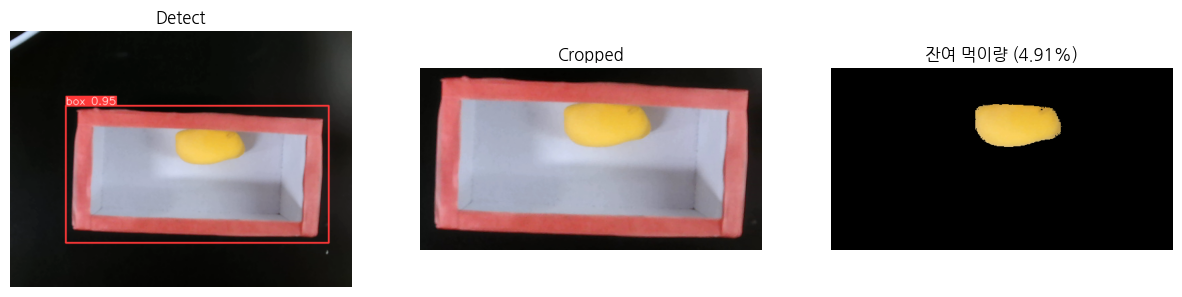

잔여 먹이량 4.91%


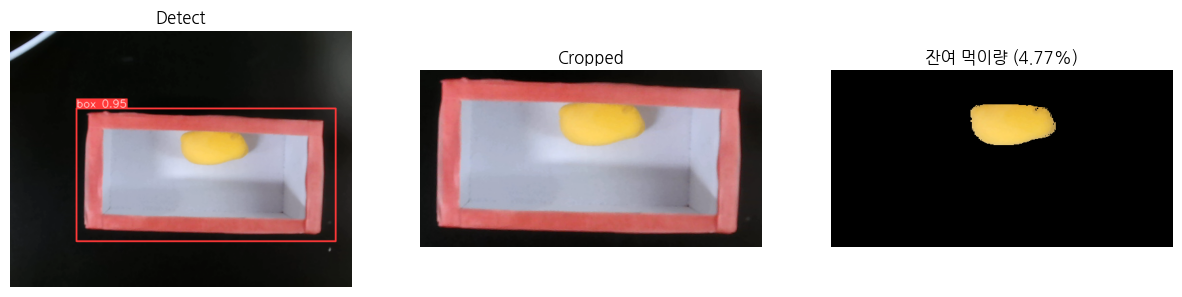

잔여 먹이량 4.77%


In [5]:
folder_show_feed_remainder("/home/addinedu/runs/detect/predict33/") # 폴더 내에 있는 이미지 전부 